In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [51]:
data = pd.read_csv("./data/owid-covid-data.csv")

In [52]:
data.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156774 entries, 0 to 156773
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    156774 non-null  object 
 1   continent                                   147351 non-null  object 
 2   location                                    156774 non-null  object 
 3   date                                        156774 non-null  object 
 4   total_cases                                 153942 non-null  float64
 5   new_cases                                   153846 non-null  float64
 6   new_cases_smoothed                          152695 non-null  float64
 7   total_deaths                                136504 non-null  float64
 8   new_deaths                                  136647 non-null  float64
 9   new_deaths_smoothed                         136515 non-null  float64
 

<AxesSubplot:>

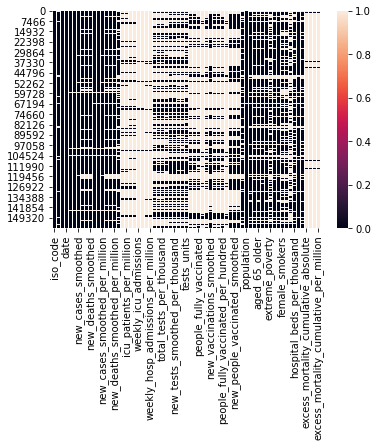

In [54]:
sns.heatmap(data.isnull())

In [55]:
data = data.fillna(0)

In [56]:
data = data[data["location"] == "Thailand"]

In [57]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
139794,THA,Asia,Thailand,2020-01-04,0.0,0.0,0.000,0.0,0.0,0.000,...,1.9,38.8,90.67,2.1,77.15,0.777,0.0,0.0,0.0,0.0
139795,THA,Asia,Thailand,2020-01-05,0.0,0.0,0.000,0.0,0.0,0.000,...,1.9,38.8,90.67,2.1,77.15,0.777,0.0,0.0,0.0,0.0
139796,THA,Asia,Thailand,2020-01-06,0.0,0.0,0.000,0.0,0.0,0.000,...,1.9,38.8,90.67,2.1,77.15,0.777,0.0,0.0,0.0,0.0
139797,THA,Asia,Thailand,2020-01-07,0.0,0.0,0.000,0.0,0.0,0.000,...,1.9,38.8,90.67,2.1,77.15,0.777,0.0,0.0,0.0,0.0
139798,THA,Asia,Thailand,2020-01-08,0.0,0.0,0.000,0.0,0.0,0.000,...,1.9,38.8,90.67,2.1,77.15,0.777,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140540,THA,Asia,Thailand,2022-01-19,2353062.0,44447.0,7515.000,21987.0,89.0,16.857,...,1.9,38.8,90.67,2.1,77.15,0.777,0.0,0.0,0.0,0.0
140541,THA,Asia,Thailand,2022-01-20,2361702.0,8640.0,8749.286,22000.0,13.0,16.714,...,1.9,38.8,90.67,2.1,77.15,0.777,0.0,0.0,0.0,0.0
140542,THA,Asia,Thailand,2022-01-21,2369814.0,8112.0,8742.714,22019.0,19.0,17.286,...,1.9,38.8,90.67,2.1,77.15,0.777,0.0,0.0,0.0,0.0
140543,THA,Asia,Thailand,2022-01-22,2377500.0,7686.0,9840.714,22032.0,13.0,16.571,...,1.9,38.8,90.67,2.1,77.15,0.777,0.0,0.0,0.0,0.0


In [58]:
data = data[["new_cases" , "date"]]

In [59]:
data.dtypes

new_cases    float64
date          object
dtype: object

In [60]:
data['date'] = pd.to_datetime(data["date"])

<ipython-input-60-354f6c1aa715>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data["date"])


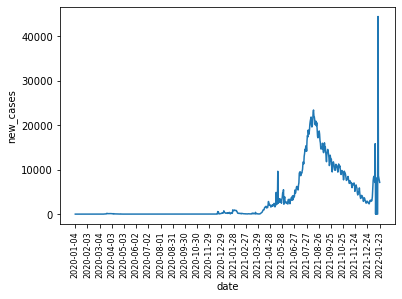

In [62]:

keys = [date for date in data["date"]]
sns.lineplot(x = "date" , y = "new_cases" , data = data)
plt.xticks(keys[::30], rotation='vertical', size=8)
plt.show()

In [63]:
data.head(5)

,new_cases,date
139794,0.0,2020-01-04
139795,0.0,2020-01-05
139796,0.0,2020-01-06
139797,0.0,2020-01-07
139798,0.0,2020-01-08


In [64]:
data = data.reset_index(drop=True)
data

,new_cases,date
0,0.0,2020-01-04
1,0.0,2020-01-05
2,0.0,2020-01-06
3,0.0,2020-01-07
4,0.0,2020-01-08
...,...,...
746,44447.0,2022-01-19
747,8640.0,2022-01-20
748,8112.0,2022-01-21
749,7686.0,2022-01-22


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [66]:
x = data.index
y = data.new_cases

X = np.array(x).reshape(-1,1)

In [67]:
transformer = PolynomialFeatures(degree=3, include_bias=False)

In [68]:
X_ = transformer.fit_transform(X)

In [69]:
model = LinearRegression().fit(X_, y)

In [70]:
model.score(X_, y)

0.5030797439176348

In [71]:
y_fit = model.predict(X_)

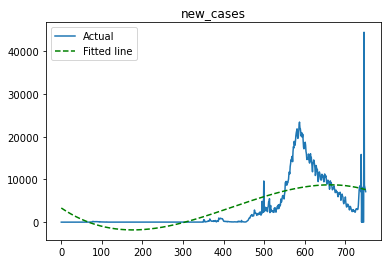

In [72]:
plt.plot(x, y, label="Actual")
plt.plot(x, y_fit, color= 'g', linestyle='dashed', label="Fitted line")
plt.title("new_cases")
plt.legend()
plt.show()

In [74]:
x_new = np.arange(len(data), len(data)+140)

X_new = np.array(x_new).reshape(-1,1)

In [75]:
X_new_ = transformer.fit_transform(X_new)

y_pred = model.predict(X_new_)

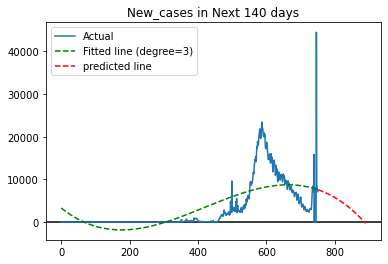

In [76]:
plt.axhline(y=0, color='black')
plt.plot(x, y, label="Actual")
plt.plot(x, y_fit, color= 'g', linestyle='dashed', label="Fitted line (degree=3)")
plt.plot(x_new, y_pred, color= 'r', linestyle='dashed', label="predicted line")
plt.title("New_cases in Next 140 days")
plt.legend()
plt.show()

In [81]:
transformer = PolynomialFeatures(degree=4, include_bias=False)

x = data.index
y = data.new_cases
X = np.array(x).reshape(-1,1)

X_ = transformer.fit_transform(X)

model = LinearRegression().fit(X_, y)

y_fit = model.predict(X_)

print(model.score(X_, y))

x_new = np.arange(len(data), len(data)+10)
X_new = np.array(x_new).reshape(-1,1)

X_new_ = transformer.fit_transform(X_new)

y_pred = model.predict(X_new_)

0.6384775664799685


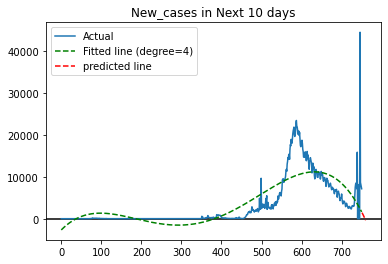

In [82]:
plt.axhline(y=0, color='black')
plt.plot(x, y, label="Actual")
plt.plot(x, y_fit, color='g', linestyle='dashed', label="Fitted line (degree=4)")
plt.plot(x_new, y_pred, color='r', linestyle='dashed', label="predicted line")
plt.title("New_cases in Next 10 days")
plt.legend()
plt.show()